# Classification


## MNIST DataSet

### Extracting the dataset

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, parser='auto')
mnist.keys()


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
x , y = mnist['data'] , mnist['target']
x.shape

(70000, 784)

In [3]:
y.shape

(70000,)

### Viewing the image

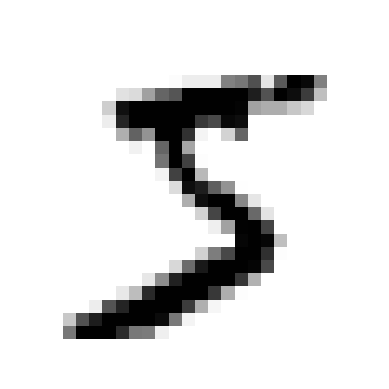

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = x.iloc[0,:]
some_digit_image = some_digit.values.reshape(28,28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [5]:
y[1000]

'0'

In [6]:
import numpy as np
y = y.astype(np.uint8)

### Spliting the DataSet

In [7]:
x_train , x_test , y_train , y_test = x[:60000] , x[60000:] , y[:60000] , y[60000:]

x_train.shape

### Training a Binary Classifier

In [8]:
y_train_5 = (y_train == 5)
y_test_5  = (y_test == 5)

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(x_train,y_train_5)

SGDClassifier()

In [10]:
sgd_clf.predict([some_digit])

E:\Classification\.env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

In [11]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(x_train, y_train_5):
    clone_clf = clone(sgd_clf)
    

    X_train_folds = x_train.iloc[train_index]
    y_train_folds = y_train_5.iloc[train_index]
    X_test_fold = x_train.iloc[test_index]
    y_test_fold = y_train_5.iloc[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))


0.9646
0.96895
0.9361


In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf , x_train , y_train_5 , cv = 3 , scoring = "accuracy")                                   

array([0.9667 , 0.9693 , 0.96805])

In [13]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf , x_train , y_train_5 , cv=3)

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5 , y_train_pred)

array([[53471,  1108],
       [ 1247,  4174]], dtype=int64)

In [15]:
y_train_5_pretends = y_train_5
confusion_matrix(y_train_5 , y_train_5_pretends)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [16]:
from sklearn.metrics import precision_score , recall_score
precision_score(y_train_5 , y_train_pred)                       # An image it claims has 5 is atually 5 only 73% of the time

0.7902309731162438

In [17]:
recall_score(y_train_5 , y_train_pred)                      # It only classifies the 77% of the 5 as 5.

0.7699686404722376

In [18]:
from sklearn.metrics import f1_score
f1_score(y_train_5  , y_train_pred)

0.7799682332056432

In [19]:
y_scores = sgd_clf.decision_function([some_digit]);
y_scores

E:\Classification\.env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([-560.02193433])

In [20]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [21]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [22]:
y_scores = cross_val_predict(sgd_clf , x_train , y_train_5 , cv = 3 , method = "decision_function")
y_scores

array([  6610.04037074, -11239.0563356 , -25212.30979504, ...,
         8681.43762866,  -9205.1000157 , -17837.90882931])

In [23]:
from sklearn.metrics import precision_recall_curve
precisions , recalls , thresholds = precision_recall_curve(y_train_5 , y_scores)

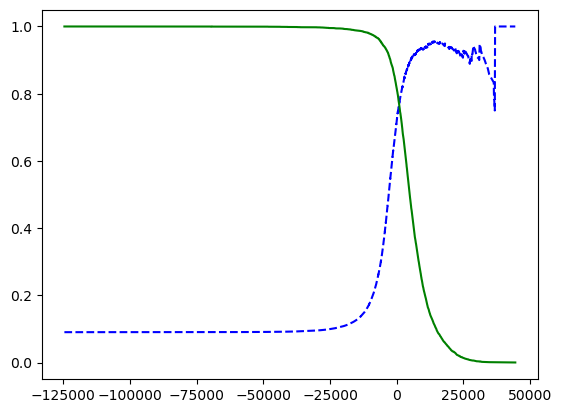

<Figure size 640x480 with 0 Axes>

In [33]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
 
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()
plt.savefig("precision_recall_vs_threshold_plot.png")  


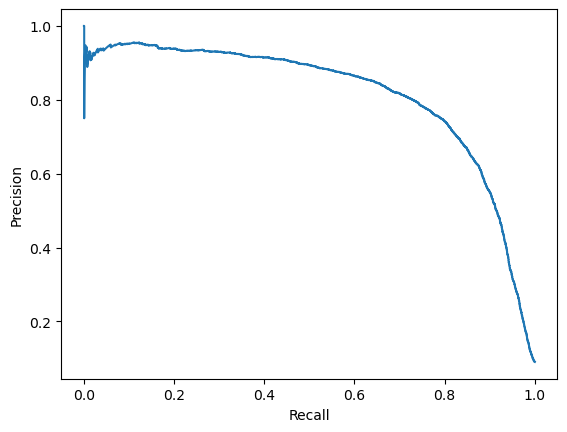

In [31]:
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot(recalls , precisions)
plt.show()

In [35]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

5218.947177193345

In [36]:
y_train_threshold_90 = (y_scores >= threshold_90_precision)

In [37]:
precision_score(y_train_5 , y_train_threshold_90)

0.9002108222066058

In [38]:
recall_score(y_train_5 , y_train_threshold_90)

0.472606530160487

In [39]:
from sklearn.metrics import roc_curve
fpr , tpr , thresholds = roc_curve(y_train_5 , y_scores)

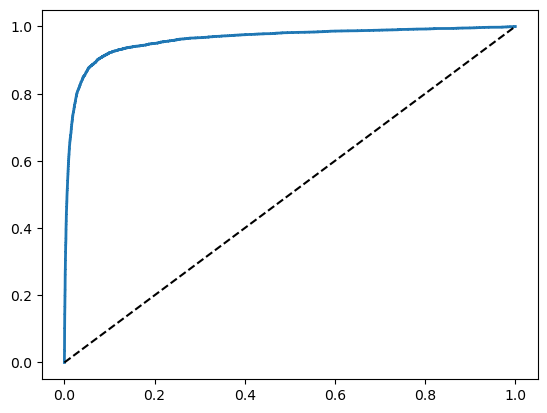

In [40]:
plt.plot(fpr , tpr , linewidth = 2 , label = None)
plt.plot([0,1],[0,1],'k--')
plt.show()

In [41]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5 , y_scores)

0.9608546557677519

### Training a RandomForest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
y_proba_forest = cross_val_predict(forest_clf , x_train , y_train_5 , cv = 3 , method = "predict_proba" )

In [46]:
y_scores_forest = y_proba_forest[:,1]


In [50]:
fpr_forest , tpr_forest , thresholds_forset = roc_curve(y_train_5 , y_scores_forest)

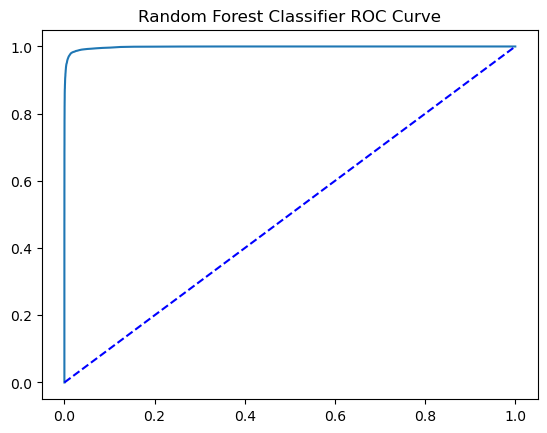

In [51]:
plt.plot(fpr_forest , tpr_forest , label = None)
plt.plot([0,1],[0,1],"b--")
plt.title("Random Forest Classifier ROC Curve")
plt.show()

In [53]:
roc_auc_score(y_train_5 , y_scores_forest)

0.9983436731328145

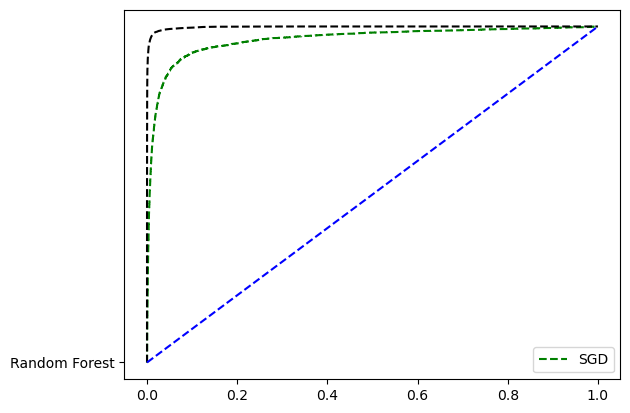

In [55]:
plt.plot(fpr , tpr , "g--" , label = "SGD")
plt.plot(fpr_forest , tpr_forest , "k--" , "Random Forest")
plt.plot([0,1],[0,1],"b--")
plt.legend(loc="lower right")
plt.show()

In [60]:
y_forest_predict = cross_val_predict(forest_clf , x_train , y_train_5 , cv = 3)

In [61]:
precision_score(y_train_5 , y_forest_predict)

0.9905083315756169

In [63]:
recall_score(y_train_5 , y_forest_predict)

0.8662608374838591

### MultiClass Classification

In [65]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(x_train , y_train)
svm_clf.predict([some_digit])

E:\Classification\.env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [68]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

E:\Classification\.env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [69]:
np.argmax(some_digit_scores)


5

In [70]:
svm_clf.classes_


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [72]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(x_train[:1000], y_train[:1000])
ovr_clf.predict([some_digit])


E:\Classification\.env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
E:\Classification\.env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
E:\Classification\.env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
E:\Classification\.env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
E:\Classification\.env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
E:\Classification\.env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn

array([5], dtype=uint8)

In [73]:
len(ovr_clf.estimators_)


10

In [75]:
sgd_clf.fit(x_train, y_train)
sgd_clf.predict([some_digit])

E:\Classification\.env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [76]:
sgd_clf.decision_function([some_digit])


E:\Classification\.env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-14682.46741263, -37278.02348458,  -6491.23104395,
         -2134.69139376, -25033.02485109,   2291.2375994 ,
        -16402.72358355, -10881.47319209,  -5466.57319648,
        -11217.2248003 ]])

In [78]:
cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring="accuracy")

array([0.81725, 0.87755, 0.87505])

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
cross_val_score(sgd_clf, x_train_scaled, y_train, cv=3, scoring="accuracy")

E:\Classification\.env\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
E:\Classification\.env\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.90335, 0.89835, 0.9039 ])

### Error Analysis

In [81]:
y_train_pred = cross_val_predict(sgd_clf, x_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5587,    0,   21,    6,    8,   40,   35,    6,  219,    1],
       [   0, 6402,   37,   25,    4,   44,    4,    8,  206,   12],
       [  27,   27, 5248,   89,   71,   27,   64,   37,  357,   11],
       [  23,   17,  116, 5238,    2,  199,   26,   41,  397,   72],
       [  12,   14,   49,   10, 5186,   11,   35,   26,  335,  164],
       [  27,   16,   31,  168,   53, 4431,   78,   15,  542,   60],
       [  30,   16,   43,    2,   43,   95, 5558,    4,  126,    1],
       [  21,   10,   52,   26,   49,   11,    3, 5698,  190,  205],
       [  18,   65,   47,   86,    3,  122,   24,   10, 5433,   43],
       [  24,   18,   30,   64,  119,   36,    1,  183,  372, 5102]],
      dtype=int64)

In [82]:
def plot_confusion_matrix(matrix):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

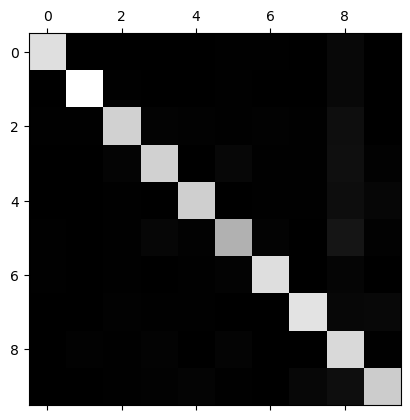

In [87]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.savefig("confusion_matrix_plot.png")
plt.show()

In [88]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

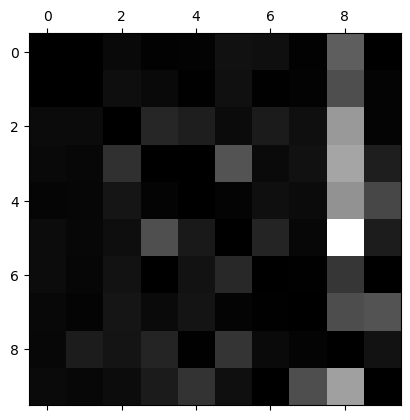

In [89]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.savefig("confusion_matrix_errors_plot.png")
plt.show()

### Multilabel Classification


In [94]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

KNeighborsClassifier()

In [95]:
knn_clf.predict([some_digit])


E:\Classification\.env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

### Multioutput Classification

In [99]:
noise = np.random.randint(0, 100, (len(x_train), 784))
x_train_mod = x_train + noise
noise = np.random.randint(0, 100, (len(x_test), 784))
x_test_mod = x_test + noise
y_train_mod = x_train
y_test_mod = x_test

In [109]:
knn_clf.fit(x_train_mod, y_train_mod)
clean_digit = knn_clf.predict([x_test_mod.iloc[some_index]])

E:\Classification\.env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


AttributeError: module 'matplotlib.pyplot' has no attribute 'digit'